In [98]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.io import wavfile
import speechpy
import numpy as np
import noisereduce as nr


In [99]:
audio_file = '../Dataset/01.Ha\'/Ha\'_M1_1.wav'

In [100]:
y, sr = librosa.load(audio_file, sr=16000)
print(y.shape, sr)

(192000,) 16000


In [101]:
# sr, y = wavfile.read(audio_file)
# print(y.shape, sr)

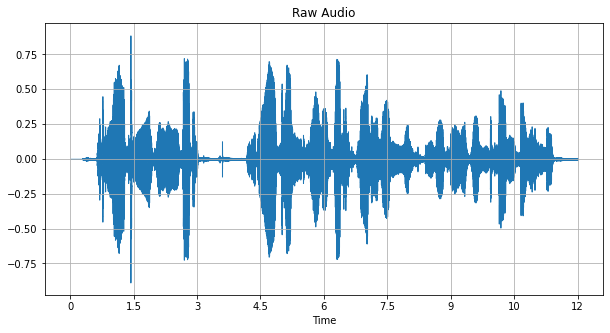

In [102]:
fig = plt.figure(figsize = (10,5))
fig.patch.set_facecolor('white')
librosa.display.waveshow(y , sr=sr)
plt.title('Raw Audio')
plt.grid(True)
plt.show()

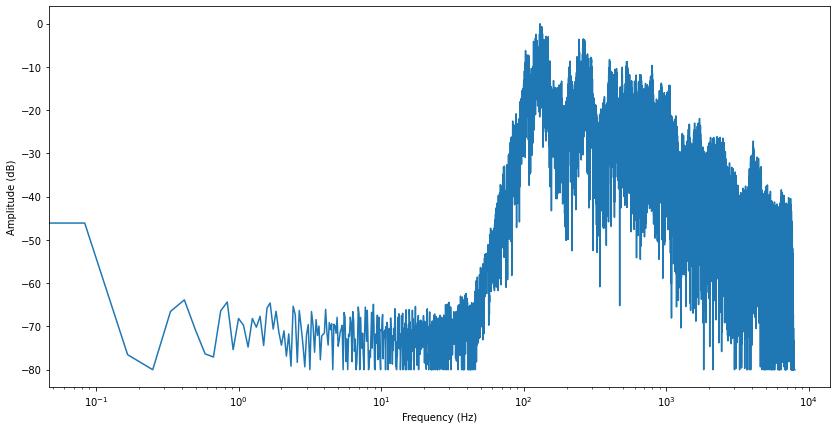

In [103]:
dft_input = y

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sr, n_fft=len(dft_input))

fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

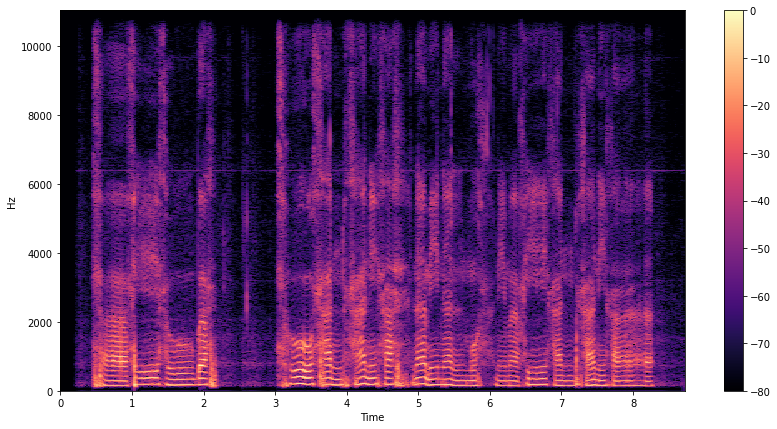

In [104]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()
plt.show()

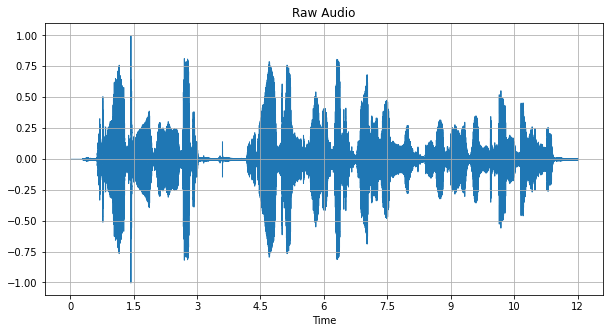

In [105]:
# normalisasi
y = librosa.util.normalize(y)
fig = plt.figure(figsize = (10,5))
fig.patch.set_facecolor('white')
librosa.display.waveshow(y , sr=sr)
plt.title('Raw Audio')
plt.grid(True)
plt.show()

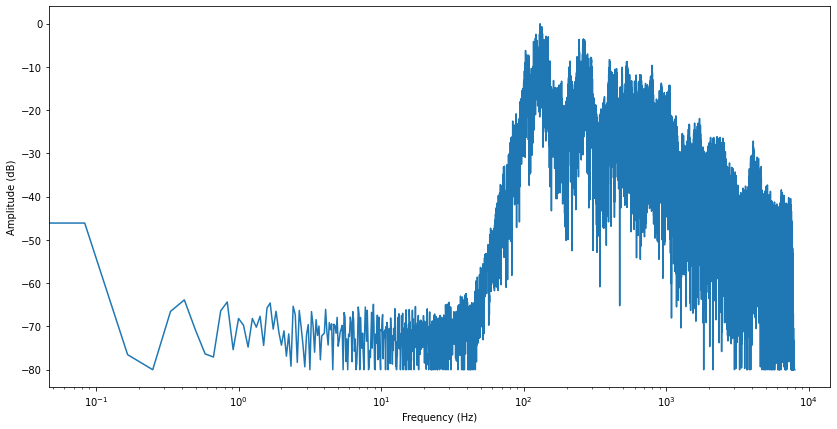

In [106]:
dft_input = y

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sr, n_fft=len(dft_input))

fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

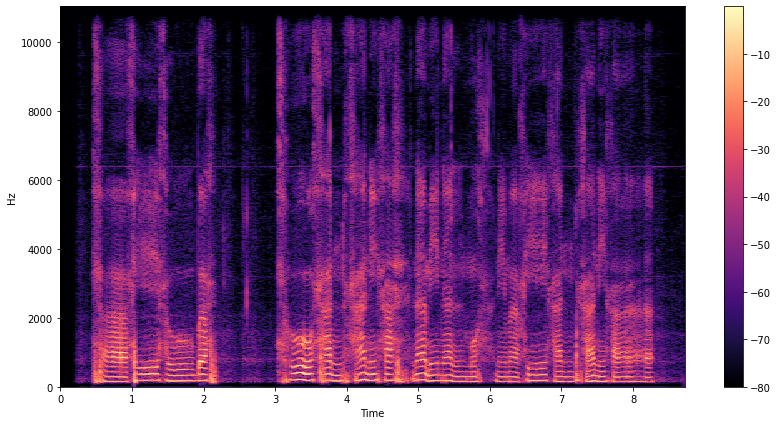

In [107]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()
plt.show()

# Preprocessing

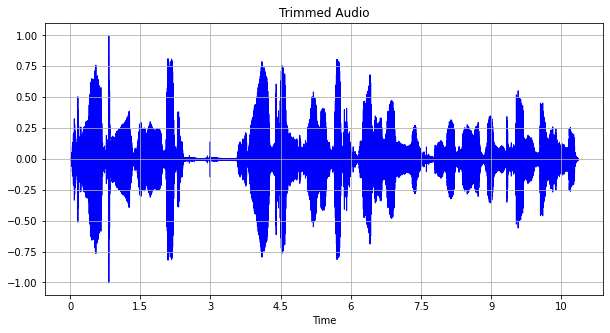

(173568,)


In [108]:
# trimmed 
y, _ = librosa.effects.trim(y, top_db=20)
fig = plt.figure(figsize = (10,5))
fig.patch.set_facecolor('white')
librosa.display.waveshow(y , sr=sr, color='blue')
plt.title('Trimmed Audio')
plt.grid(True)
plt.show()
print(y.shape)

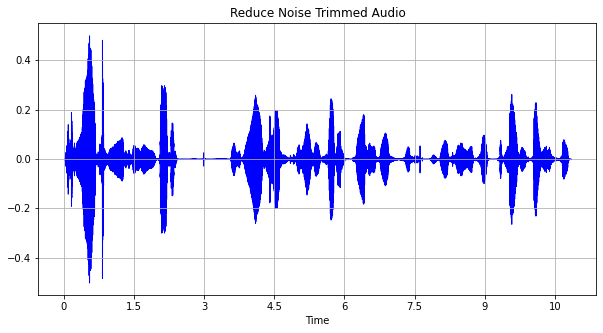

(173568,)


In [109]:
y = nr.reduce_noise(y, sr)
fig = plt.figure(figsize = (10,5))
fig.patch.set_facecolor('white')
librosa.display.waveshow(y , sr=sr, color='blue')
plt.title('Reduce Noise Trimmed Audio')
plt.grid(True)
plt.show()
print(y.shape)

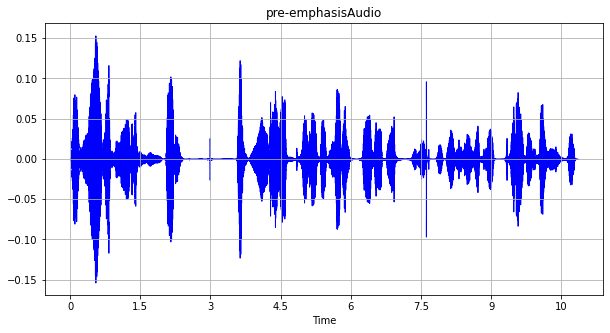

(173568,)


In [110]:
# preemphasis
y = librosa.effects.preemphasis(y, coef=0.95)
fig = plt.figure(figsize = (10,5))
fig.patch.set_facecolor('white')
librosa.display.waveshow(y , sr=sr, color='blue')
plt.title('pre-emphasisAudio')
plt.grid(True)
plt.show()
print(y.shape)

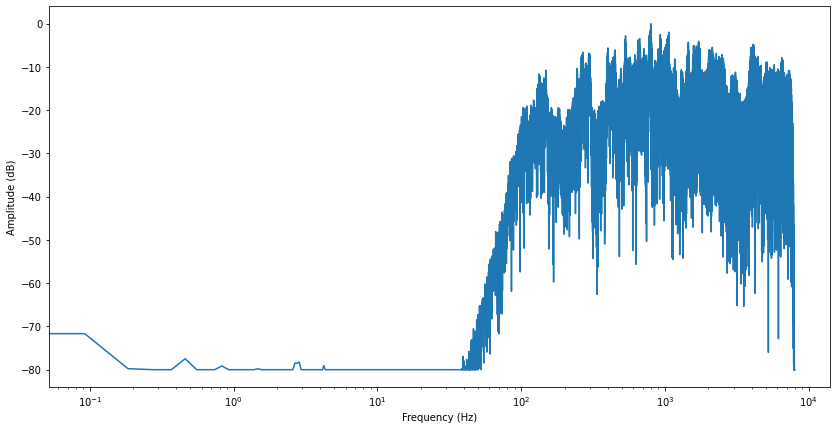

In [111]:
dft_input = y

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sr, n_fft=len(dft_input))

fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

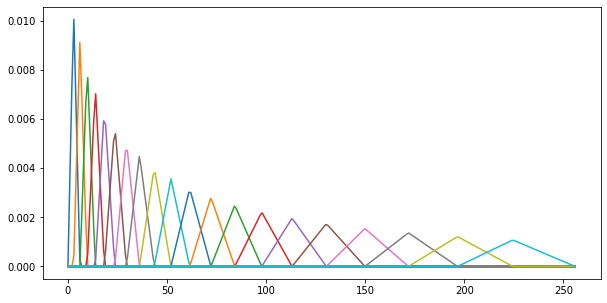

In [112]:
mel =librosa.filters.mel(sr=sr, n_fft=512, n_mels=20, fmin=0, fmax=8000, htk=True) # awal = fmax=sr / 2

fig = plt.figure(figsize = (10,5))
fig.patch.set_facecolor('white')
plt.plot(mel.T)
plt.show()

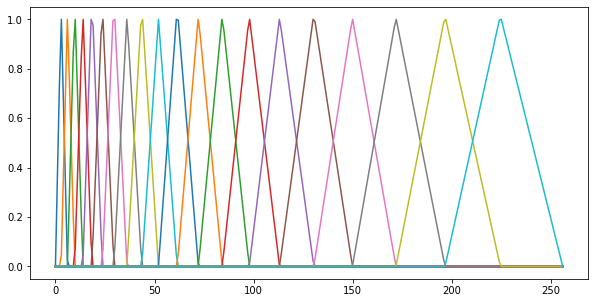

In [113]:
mel /= np.max(mel, axis=-1)[:, None]
fig = plt.figure(figsize = (10,5))
fig.patch.set_facecolor('white')
plt.plot(mel.T)
plt.show()

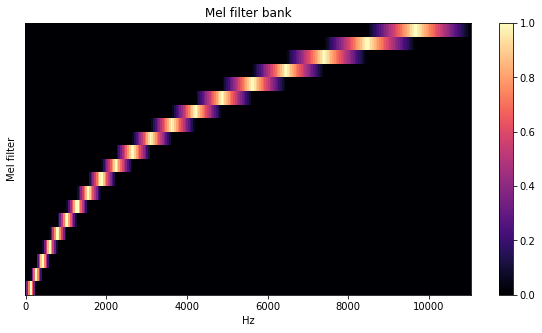

In [114]:
fig, ax = plt.subplots(figsize = (10,5))
fig.patch.set_facecolor('white')
img = librosa.display.specshow(mel, x_axis='linear', ax=ax)
ax.set(ylabel='Mel filter', title='Mel filter bank')
fig.colorbar(img, ax=ax)
plt.show()

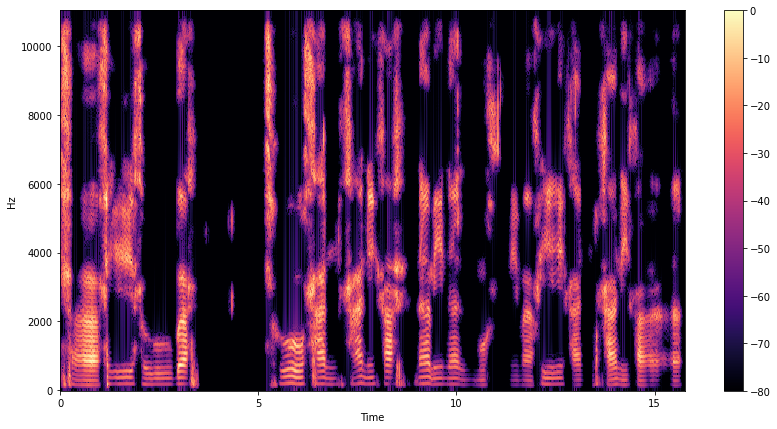

In [115]:
#spectogram
D = librosa.stft(y, n_fft=512, hop_length=256, window='hamming')
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()
plt.show()

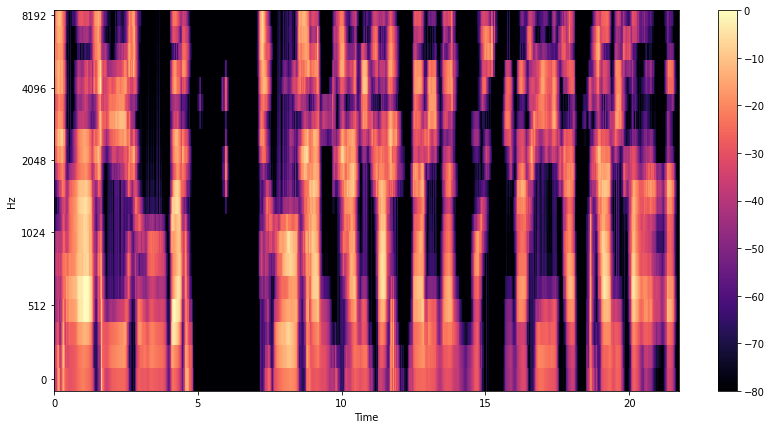

In [116]:
#mel spectogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=20, fmax=8000, window='hamming', n_fft=512, hop_length=256)
S_dB = librosa.power_to_db(S, ref=np.max)

fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sr, fmax=8000)
plt.colorbar()